**Modern Portfolio Theory (MPT)**

This notebook is a quick illustration of how Empyrial can be used for obtaining the optimal allocations.

In the example below, we pick some stocks and benchmark it against the S&P500. We are using SPY as it's the next-alternative 

(as opposed to trying to come up with our own allocations).



In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd

**Parameter values:** <1>
* start_date = 2020-01-01; it's discretionary (Note 1)
* portfolio = List of string of symbols. Here, it's just a selection of large caps. 
* optimizer = "MINVAR" - Applying MPT with objective to minimize portfolio variance
* rebalance = once per quarter

Note 1: For "start_date" - Although academic studies suggest 12-months is the ideal lookback period for backtesting, the choice of it may rather be arbitrary. It can be argued that trying to find a best fitted start-end date for strategies over historical data may be counter productive. <2> 

In [3]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-06-28'

In [4]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = ["AAPL","JNJ","KO","MRK","PFE","PM","TSM", "MSFT", "MCD", "TSLA"],
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "quarterly"
)

# Summary:

Start date: 2021-06-28
End date: 2023-07-28


,Backtest
,
Annual return,13.35%
Cumulative return,29.2%
Annual volatility,15.65 %
Winning day ratio,53.4%
Sharpe ratio,0.88
Calmar ratio,0.87
Information ratio,0.0
Stability,0.48
Max Drawdown,-15.05 %


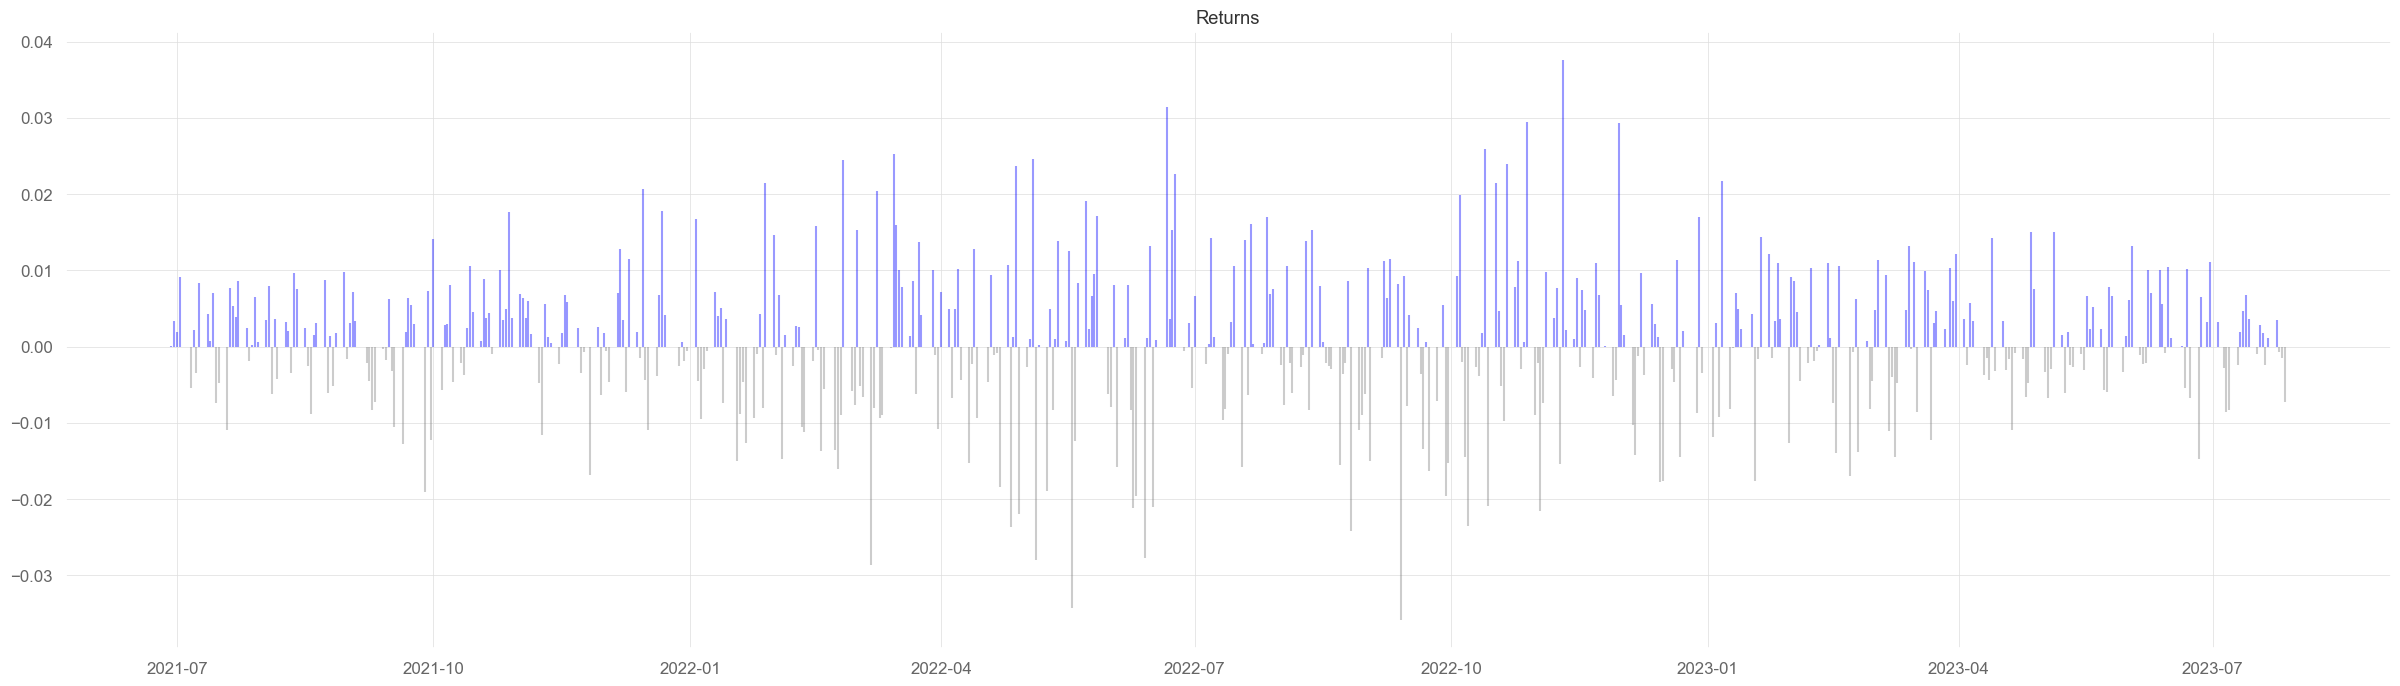

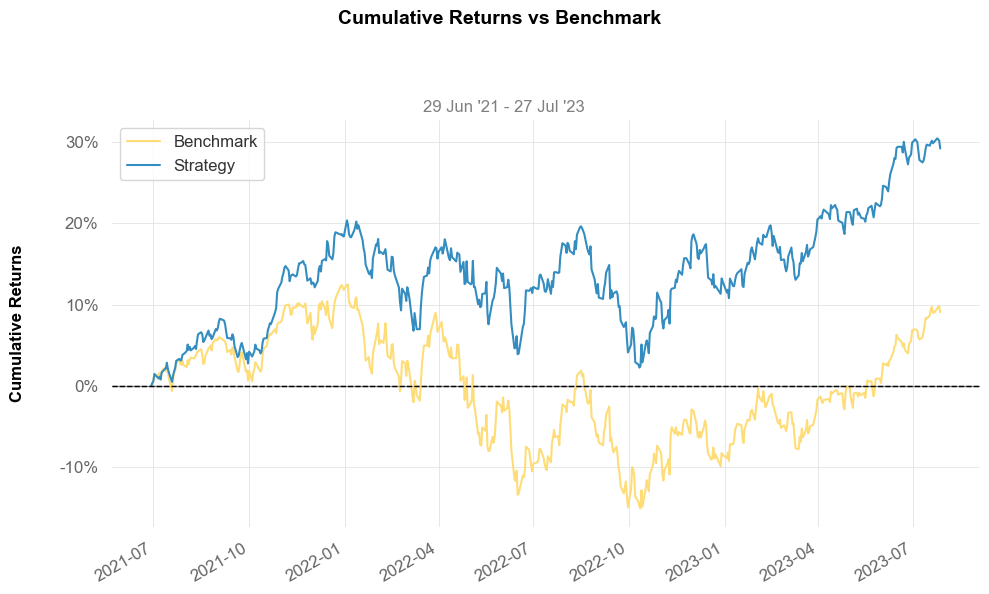

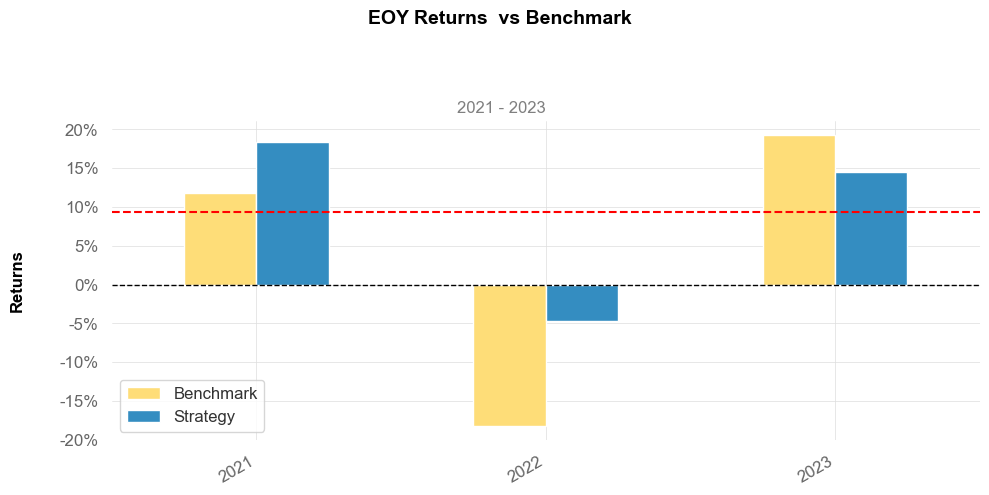

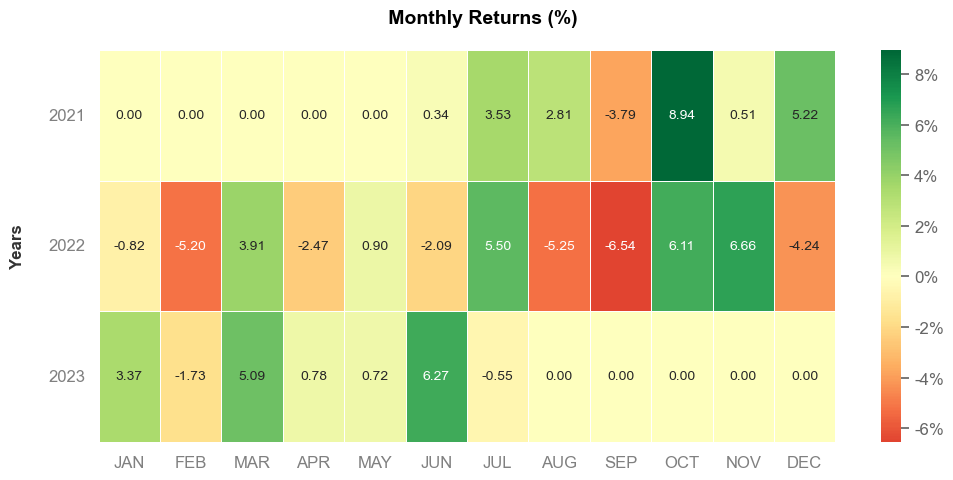

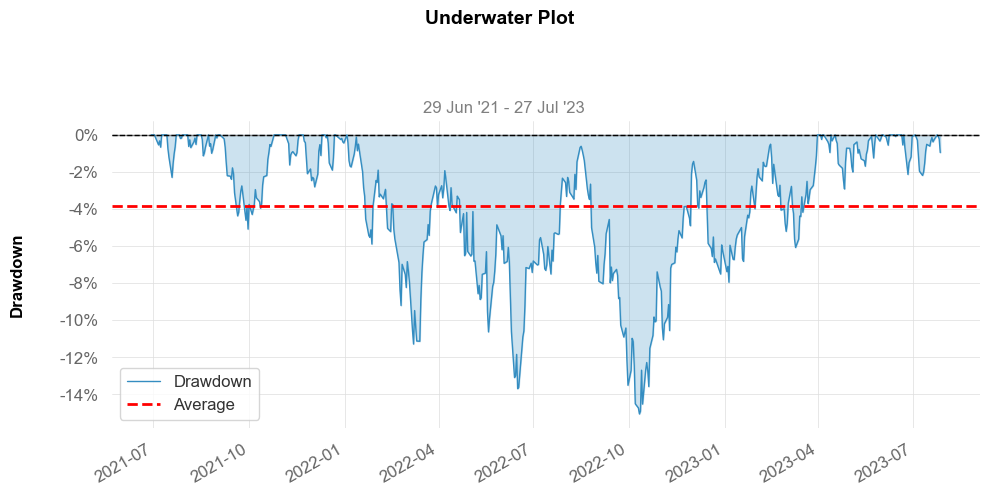

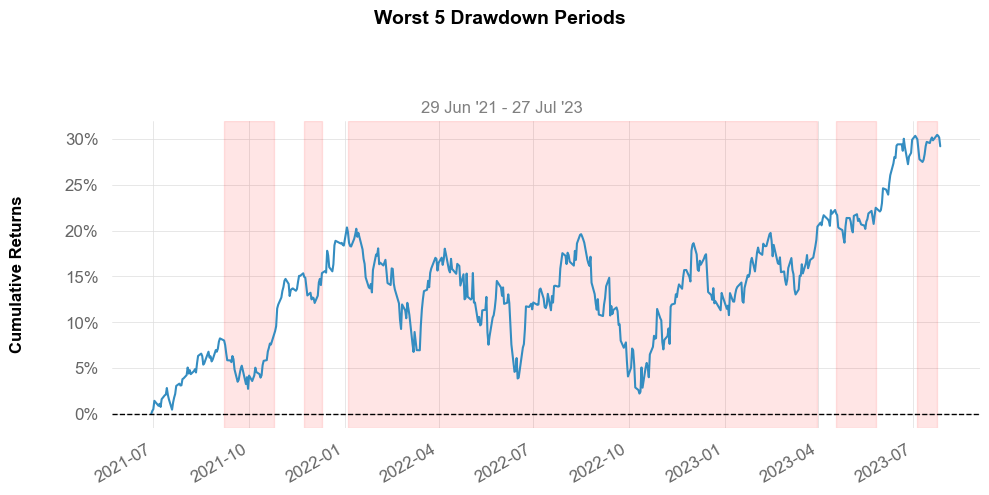

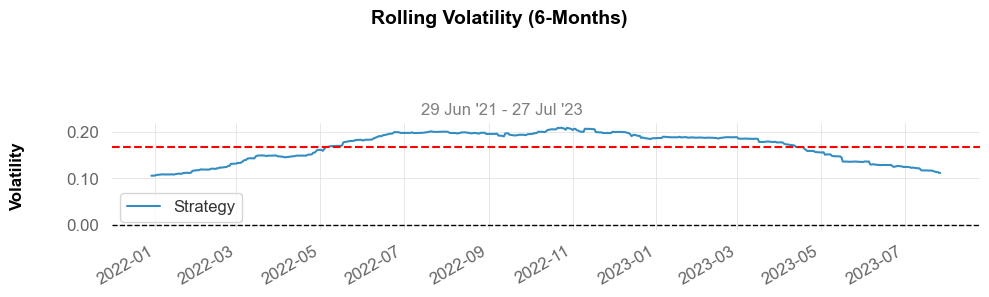

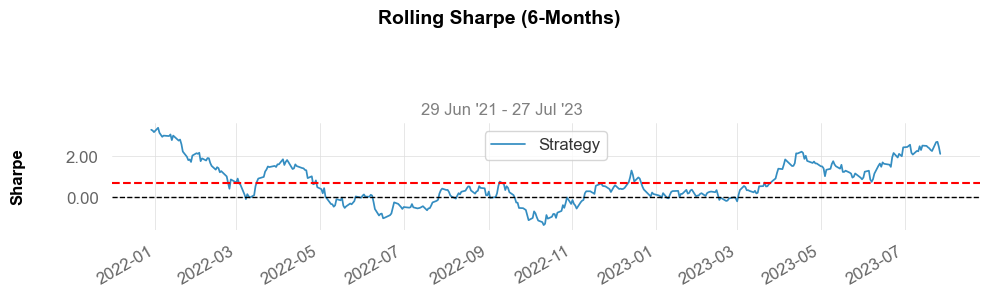

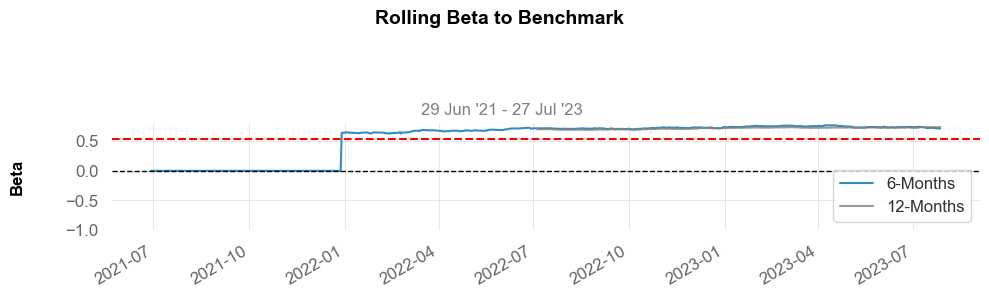

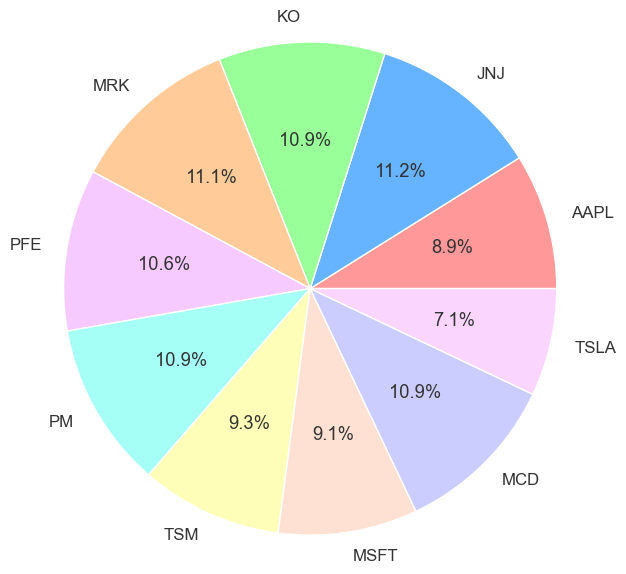

In [5]:
empyrial(portfolio);

# Summary of allocations

In [6]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-09-27,2021-12-27,2022-03-28,2022-06-28,2022-09-27,2022-12-27,2023-03-28,2023-06-28,2023-07-28
AAPL,0.09569,0.09629,0.09398,0.08880,0.08890,0.08621,0.08734,0.08847,0.08893
JNJ,0.10086,0.10415,0.10868,0.11233,0.11228,0.11397,0.11317,0.11237,0.11213
KO,0.10146,0.10269,0.10651,0.10831,0.10854,0.10935,0.10942,0.10928,0.10903
MRK,0.10251,0.10148,0.10650,0.11020,0.11035,0.11282,0.11251,0.11181,0.11140
PFE,0.09843,0.10332,0.10570,0.10654,0.10611,0.10657,0.10670,0.10632,0.10609
PM,0.10054,0.10303,0.10461,0.10980,0.10934,0.10928,0.10926,0.10881,0.10869
TSM,0.09970,0.09827,0.09370,0.09302,0.09353,0.09194,0.09228,0.09277,0.09296
MSFT,0.09960,0.09804,0.09611,0.09315,0.09244,0.08993,0.09056,0.09118,0.09138
MCD,0.10164,0.10288,0.10489,0.10702,0.10743,0.10962,0.10937,0.10897,0.10884
TSLA,0.09957,0.08984,0.07932,0.07084,0.07108,0.07030,0.06940,0.07001,0.07055


In [7]:
print("But only want the allocation as of today: ") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

But only want the allocation as of today: 


,2023-07-28
AAPL,0.08893
JNJ,0.11213
KO,0.10903
MRK,0.11140
PFE,0.10609
PM,0.10869
TSM,0.09296
MSFT,0.09138
MCD,0.10884
TSLA,0.07055


---
References:

<1> Quick guide on how to set the parameter [https://empyrial.gitbook.io/empyrial/quickstart](https://empyrial.gitbook.io/empyrial/quickstart)

<2> Toma Hentea; Feb. 2019; "Optimal Lookback Period For Momentum Strategies" [Article from seekingalpha](https://seekingalpha.com/article/4240540-optimal-lookback-period-for-momentum-strategies )